In [44]:
from cpclasses import *

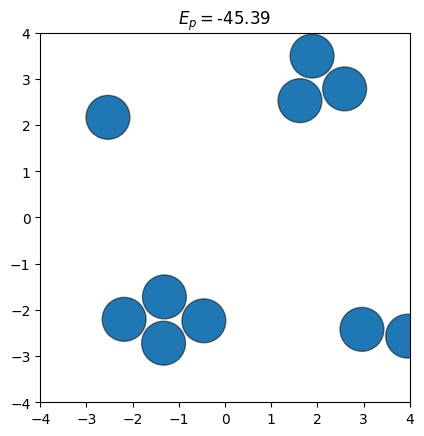

In [45]:
LJ = LennardJones()
cluster = AtomicCluster(calc = LJ,N=10)


relax(cluster, steps=1009, tol = 0.005)

fig, ax = plt.subplots()

ax.set(xlim=(-4, 4), ylim=(-4,4), aspect='equal')

cluster.draw(ax, size=1000)

[(0.7, 2.0), (-5.0, 1.0)]

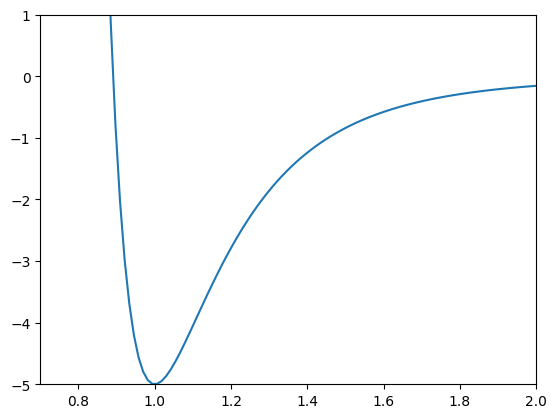

In [46]:
fig, ax = plt.subplots()

xs = np.linspace(0.8, 2, 100)

ax.plot(xs, LJ._V(xs))
ax.set(xlim=(0.7, 2), ylim=(-5, 1))

In [47]:


def nvt_thermostat(md):
    
    m = 1  # atomic mass (assuming m = 1 for simplicity)
    velocities = md.get_velocities()

    v = np.random.randn(*velocities.shape)

    v = v - np.mean(v, axis=0)

    v = (3 * velocities.shape[0]*md.kT/np.sum(v**2)) * v


    return v


def nvt_thermostat_low_dimension(cluster, m = 1):

    
    std = np.sqrt(cluster.kT/m)

    velocities = cluster.get_velocities()

    v = np.random.randn(*velocities.shape)

    

    v = v*std

    cluster.set_velocities(v)

    return v

def thermostat(cluster, T):

    velocities = cluster.get_velocities()
    
    if np.all(velocities == 0):
        velocities = np.random.randn(*velocities.shape)
        velocities = velocities * np.sqrt(cluster.kT)
    
    current_temperature = 1# np.sum(velocities**2)/(2*cluster.N)

    factor = np.sqrt(T/current_temperature)

    velocities = factor*velocities

    cluster.set_velocities(velocities)

    return velocities

nvt_thermostat_low_dimension(cluster)


array([[-0.27607723,  0.22514003],
       [-0.10014943, -0.60177113],
       [ 0.70412622, -0.21296032],
       [-0.11154689, -0.38387634],
       [-0.17954941,  0.26626027],
       [ 0.03172663, -0.02695308],
       [-0.10221213, -0.43468452],
       [-0.29010324, -0.3983756 ],
       [-0.14861015, -0.41461956],
       [ 0.05824533, -0.35404734]])

In [48]:
LJ = LennardJones()
cluster = AtomicCluster(calc = LJ,N=3)


relax(cluster, steps=1000, tol = 1e-6)

print(cluster.potential_energy + cluster.kinetic_energy)
nvt_thermostat(cluster)

velocity_verlet(cluster, N = 50, dt=0.01)
print(cluster.potential_energy + cluster.kinetic_energy)

-14.999999807610504
-14.999999809261833


In [49]:
kT = 0.05

cluster = AtomicCluster(calc = LJ,N=3, kT=kT)
relax(cluster, steps=1000, tol = 1e-6)
energies = []
for _ in range(1000):
    velocity_verlet(cluster, N = 50, dt=0.001)
    nvt_thermostat(cluster)
    
    energy = cluster.potential_energy + cluster.kinetic_energy
    #print(energy)
    energies.append(energy)


In [50]:
print(energies)

[-5.000363712713268, -5.000363712690112, -5.000363712702483, -5.000363712703453, -5.000363712689325, -5.000363712713698, -5.000363712684118, -5.000363712712801, -5.000363712690934, -5.000363712701462, -5.000363712704443, -5.000363712688584, -5.000363712714045, -5.000363712684226, -5.000363712712249, -5.0003637126918035, -5.000363712700468, -5.000363712705374, -5.000363712687891, -5.000363712714345, -5.000363712684385, -5.000363712711672, -5.000363712692693, -5.000363712699436, -5.000363712706319, -5.000363712687246, -5.00036371271457, -5.000363712684627, -5.000363712711009, -5.000363712693629, -5.000363712698435, -5.000363712707195, -5.000363712686658, -5.0003637127147345, -5.000363712684917, -5.000363712710328, -5.00036371269457, -5.000363712697411, -5.000363712708075, -5.000363712686122, -5.00036371271483, -5.000363712685284, -5.000363712709567, -5.000363712695555, -5.000363712696422, -5.00036371270888, -5.000363712685651, -5.000363712714861, -5.000363712685701, -5.000363712708797, -

[(-15.0, 10.0)]

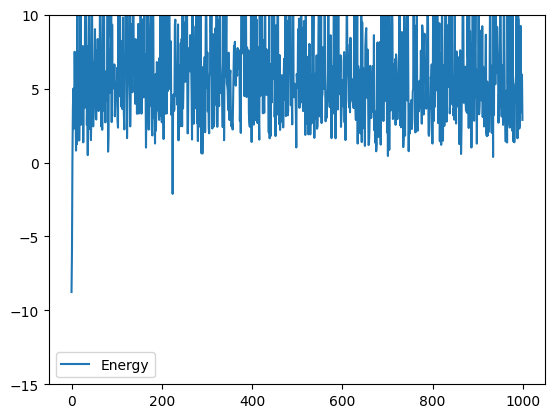

In [51]:
def simulate(cluster, steps=1000, dt=0.01):
    energies = []
    positions = []
    relax(cluster, steps=100, tol = 1e-6)
    
    for _ in range(steps):
        nvt_thermostat_low_dimension(cluster, m=1)
        velocity_verlet(cluster, N = 50, dt=0.01)
        

        energies.append(cluster.kinetic_energy + cluster.potential_energy)
        positions.append(cluster.get_positions())
    return energies, positions


pos = [[-0.5, -0.5], [0.5, -0.5], [0, 0.5]]
cluster = AtomicCluster(calc = LJ,pos = pos, kT=2)

energies, positions = simulate(cluster, steps=1000, dt=0.001)


fig, ax = plt.subplots()
ax.plot(energies, label='Energy')


ax.legend()
ax.set(ylim=(-15, 10))

[(-5.0, 5.0), (-5.0, 5.0), None]

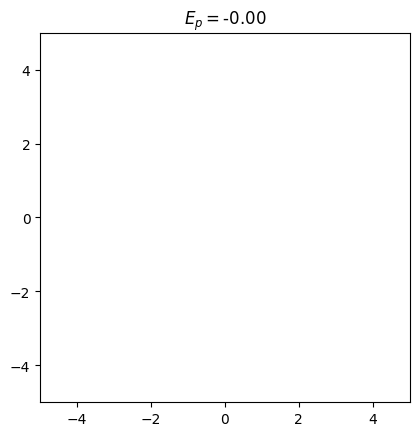

In [52]:
fig, ax = plt.subplots()
cluster.pos

cluster.draw(ax, size=500, center=True)

ax.set(xlim=(-5,5), ylim=(-5,5), aspect='equal')

In [53]:
kTs = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
pos = [[-0.5, -0.5], [0.5, -0.5], [0, 0.5]]
energies_all = []
positions_all = []

for kT in kTs:
    cluster = AtomicCluster(calc = LJ,pos = pos, kT=kT)
    energies, positions = simulate(cluster, steps=1000, dt=0.01)
    energies_all.append(energies)
    positions_all.append(positions)
    print(cluster.kT)



0.05
0.1
0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0


In [54]:
def update(j):



    #Plot energies in the second and fourth row
    for i, energy, position in zip(range(12), energies_all, positions_all):
        cluster.set_positions(positions_all[i][10*j])
        cluster.draw(axs[i//6 * 2, i%6], size=25, center=True)

        axs[i//6 * 2, i%6].set_title(f"kT = {kTs[i]}")
        #axs[i//6 * 2, i%6].scatter(position[-1][:,0], position[-1][:,1])
        axs[i//6 * 2, i%6].set(xlim=(-10, 10), ylim=(-10,10), aspect='equal')
        
        axs[i//6 * 2 + 1, i%6].clear()
        axs[i//6 * 2 + 1, i%6].plot(range(10*j), energy[:10*j])
        axs[i//6 * 2 + 1, i%6].set( ylim=(-16, 10), xlim=(0, 1000))


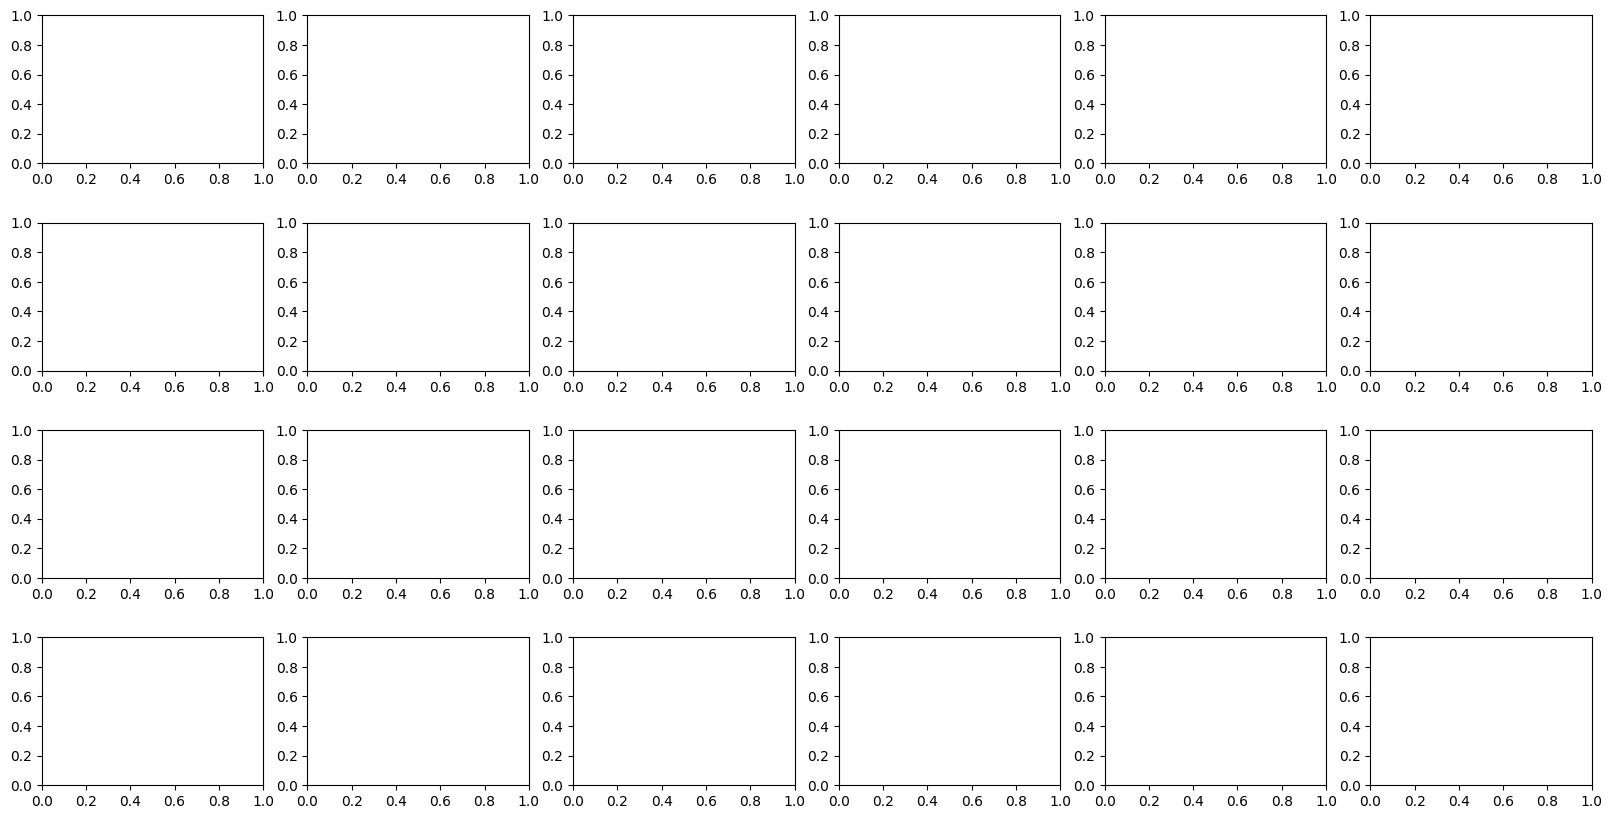

In [55]:
fig, axs = plt.subplots(4,6, figsize=(20,10), gridspec_kw={'hspace': 0.4})



#ani = FuncAnimation(fig, update, frames=100, repeat=False)

#save_animation(ani, 'Thermostat.gif', fps=25)



In [56]:
thermal_averages = []

for energies in energies_all:
    thermal_averages.append(np.mean(energies[-200:]))

C_Vs = []

for i in range(len(thermal_averages)-1):
    C_Vs.append((thermal_averages[i+1] - thermal_averages[i])/(kTs[i+1] - kTs[i]))



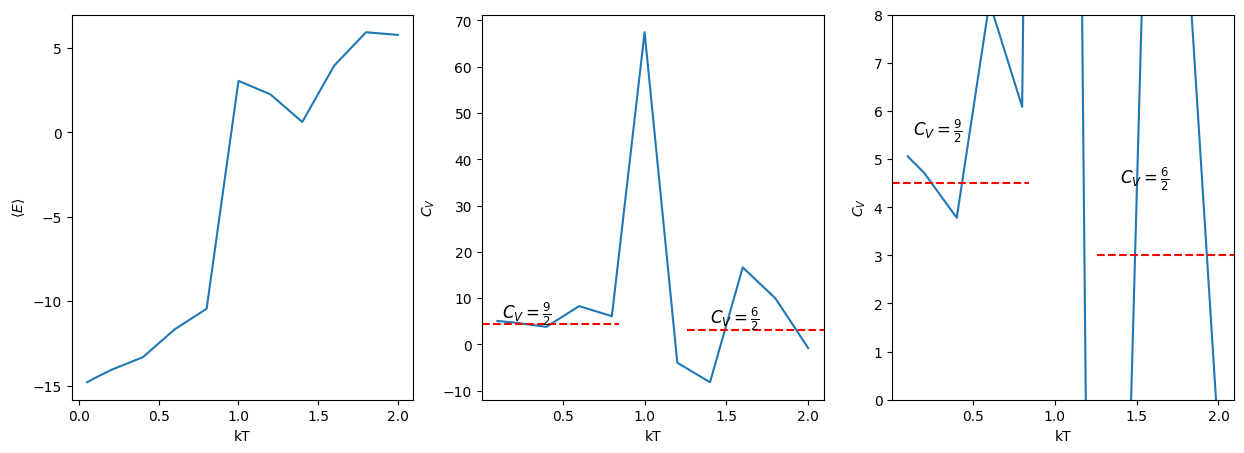

In [57]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(kTs, thermal_averages)
axs[0].set(xlabel='kT', ylabel=r'$\langle E\rangle$')

axs[1].plot(kTs[1:], C_Vs)
axs[1].set(xlabel='kT', ylabel=r'$C_V$')
axs[1].axhline(9/2, xmax=0.4, color='r', linestyle='--')
axs[1].text(0.13, 5.5, r'$ C_V = \frac{9}{2}$', fontsize=12)
axs[1].axhline(6/2, xmin = 0.6, color='r', linestyle='--')
axs[1].text(1.4, 4.5, r'$ C_V = \frac{6}{2}$', fontsize=12)


axs[2].plot(kTs[1:], C_Vs)
axs[2].set(xlabel='kT', ylabel=r'$C_V$', ylim=(0, 8))
axs[2].axhline(9/2, xmax=0.4, color='r', linestyle='--')
axs[2].text(0.13, 5.5, r'$ C_V = \frac{9}{2}$', fontsize=12)
axs[2].axhline(6/2, xmin = 0.6, color='r', linestyle='--')
axs[2].text(1.4, 4.5, r'$ C_V = \frac{6}{2}$', fontsize=12)

save_plot(fig,'Evaporation.png')